## 3 Observations from the Data

1. Capomulin was the only observed drug that showed a reduction in tumor growth over the 45 day study.


2. Infubinol, although it did not show a reduction in tumor growth did have a lower metastatic site spread compared to the Placebo and Ketapril.


3. Capomulin also had a higher survival rate in mice compared to the other observed drugs over the 45 day study.


In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Load and Read in the 2 csv files
mouse_data = pd.read_csv("data/mouse_drug_data.csv")
clinical_data = pd.read_csv("data/clinicaltrial_data.csv")

# Combine the data into a single dataset
merged_data = pd.merge(mouse_data, clinical_data, on="Mouse ID")

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_grouped = merged_data.groupby(["Drug", "Timepoint"])

# Convert to DataFrame
mean_tumor_data = pd.DataFrame(mean_tumor_grouped.mean())


# Reset index so Drug and Timepoint are columns again
mean_tumor_data = mean_tumor_data.reset_index()

# Preview DataFrame
mean_tumor_data.head()

,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.160000
2,Capomulin,10,43.084291,0.320000
3,Capomulin,15,42.064317,0.375000
4,Capomulin,20,40.716325,0.652174


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_error_df = pd.DataFrame(mean_tumor_grouped.sem())

# Reset index so Drug and Timepoint are columns again
std_error_df = std_error_df.reset_index()

# Preview DataFrame
std_error_df.head()


,Drug,Timepoint,Metastatic Sites,Mouse ID,Tumor Volume (mm3)
0,Capomulin,0,0.000000,NaN,0.000000
1,Capomulin,5,0.074833,NaN,0.448593
2,Capomulin,10,0.125433,NaN,0.702684
3,Capomulin,15,0.132048,NaN,0.838617
4,Capomulin,20,0.161621,NaN,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
tumor_mean = mean_tumor_data.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")


tumor_error = std_error_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")


# Preview that Reformatting worked
print(tumor_mean.head())
print(tumor_error.head())



Drug       Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol    Placebo  \
Timepoint                                                                     
0          45.000000  45.000000  45.000000  45.000000  45.000000  45.000000   
5          44.266086  46.503051  47.062001  47.389175  46.796098  47.125589   
10         43.084291  48.285125  49.403909  49.582269  48.694210  49.423329   
15         42.064317  50.094055  51.296397  52.399974  50.933018  51.359742   
20         40.716325  52.157049  53.197691  54.920935  53.644087  54.364417   

Drug        Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                              
0          45.000000  45.000000  45.000000  45.000000  
5          47.248967  43.944859  47.527452  46.851818  
10         49.101541  42.531957  49.463844  48.689881  
15         51.067318  41.495061  51.529409  50.779059  
20         53.346737  40.238325  54.067395  53.170334  
Drug       Capomulin  Ceftamin  Infubinol  Ketapril  N

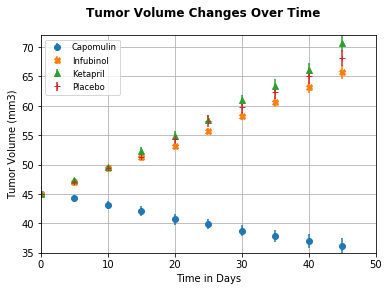

In [16]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()

fig.suptitle("Tumor Volume Changes Over Time",
             fontsize=12, fontweight="bold")

ax.errorbar(tumor_mean.index, tumor_mean["Capomulin"],
            tumor_error["Capomulin"], fmt="o")

ax.errorbar(tumor_mean.index, tumor_mean["Infubinol"],
            tumor_error["Infubinol"], fmt="X")

ax.errorbar(tumor_mean.index, tumor_mean["Ketapril"], 
            tumor_error["Ketapril"], fmt="^")

ax.errorbar(tumor_mean.index, tumor_mean["Placebo"], 
            tumor_error["Placebo"], fmt="+")

ax.set_xlim(0, 50)
ax.set_ylim(35, 72)

ax.set_xlabel ("Time in Days")
ax.set_ylabel("Tumor Volume (mm3)")

plt.legend(loc="best", fontsize="small", fancybox=True)

plt.grid()

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [6]:
# Use the mean_tumor_grouped dataframe again but keep different columns 

# Convert to DataFrame
mean_sites = mean_tumor_grouped.mean()

# Reset index so Drug and Timepoint are columns again
mean_sites = mean_sites.reset_index()

#Keep Metastatic Sites column
mean_sites = mean_sites[["Drug", "Timepoint", "Metastatic Sites"]]

# Preview DataFrame
mean_sites.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [7]:
# Store the Standard Error of Met. Site Data Grouped by Drug and Timepoint
error_sites = mean_tumor_grouped.sem()

# Reset index so Drug and Timepoint are columns again
error_sites = error_sites.reset_index()

# Keep Metastatic Sites column
error_sites = error_sites[["Drug", "Timepoint", "Metastatic Sites"]]

# Preview DataFrame
error_sites.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [8]:
# Minor Data Munging to Re-Format the Data Frames
site_mean = mean_sites.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")


site_error = error_sites.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")


# Preview that Reformatting worked
print(site_mean.head())
print(site_error.head())



Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol   Placebo  \
Timepoint                                                                 
0           0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
5           0.160000  0.380952   0.280000  0.304348  0.260870  0.375000   
10          0.320000  0.600000   0.666667  0.590909  0.523810  0.833333   
15          0.375000  0.789474   0.904762  0.842105  0.857143  1.250000   
20          0.652174  1.111111   1.050000  1.210526  1.150000  1.526316   

Drug       Propriva  Ramicane  Stelasyn  Zoniferol  
Timepoint                                           
0          0.000000  0.000000  0.000000   0.000000  
5          0.320000  0.120000  0.240000   0.166667  
10         0.565217  0.250000  0.478261   0.500000  
15         0.764706  0.333333  0.782609   0.809524  
20         1.000000  0.347826  0.952381   1.294118  
Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol   Placebo  \
Timepoint                   

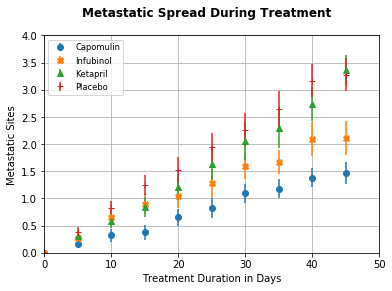

In [9]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()

fig.suptitle("Metastatic Spread During Treatment",
             fontsize=12, fontweight="bold")

ax.errorbar(site_mean.index, site_mean["Capomulin"],
            site_error["Capomulin"], fmt="o")

ax.errorbar(site_mean.index, site_mean["Infubinol"],
            site_error["Infubinol"], fmt="X")

ax.errorbar(site_mean.index, site_mean["Ketapril"], 
            site_error["Ketapril"], fmt="^")

ax.errorbar(site_mean.index, site_mean["Placebo"], 
            site_error["Placebo"], fmt="+")

ax.set_xlim(0, 50)
ax.set_ylim(0.00, 4.00)

ax.set_xlabel ("Treatment Duration in Days")
ax.set_ylabel("Metastatic Sites")

plt.legend(loc="best", fontsize="small", fancybox=True)

plt.grid()

# Show the Figure
plt.show()

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

mice_grouped = merged_data.groupby(["Drug", "Timepoint"])

# Convert to DataFrame
mice_count = mice_grouped.count()

# Reset index so Drug and Timepoint are columns again
mice_count = mice_count.reset_index()

#Keep only Mouse ID column from data
mice_count = mice_count[["Drug", "Timepoint", "Mouse ID"]]

#Rename Mouse ID column to Mouse Count
mice_count = mice_count.rename(columns={"Mouse ID": "Mouse Count"})

# Preview DataFrame
mice_count.head()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count = mice_count.pivot(index="Timepoint", columns="Drug", values="Mouse Count")


# Preview that Reformatting worked
mouse_count.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


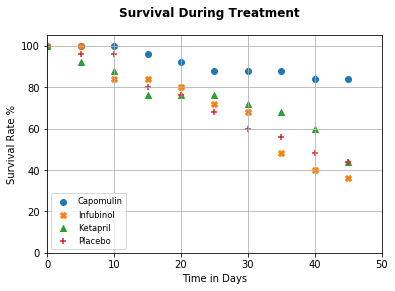

In [12]:
fig, ax = plt.subplots()

fig.suptitle("Survival During Treatment",
             fontsize=12, fontweight="bold")

ax.scatter(mouse_count.index,(mouse_count["Capomulin"]/25*100), marker="o")

ax.scatter(mouse_count.index,(mouse_count["Infubinol"]/25*100), marker="X")

ax.scatter(mouse_count.index,(mouse_count["Ketapril"]/25*100), marker="^")

ax.scatter(mouse_count.index,(mouse_count["Placebo"]/25*100), marker="+")

ax.set_xlim(0, 50)
ax.set_ylim(0, 105)

ax.set_xlabel ("Time in Days")
ax.set_ylabel("Survival Rate %")



plt.legend(loc="best", fontsize="small", fancybox=True)

plt.grid()
# Show the Figure
plt.show()

In [13]:
#Calculating % change for each drug

capo = tumor_mean["Capomulin"]
capo
capochange = (1 - capo[0]/capo[45])*100
capochange

infu = tumor_mean["Infubinol"]
infuchange = (1 - infu[0]/infu[45])*100
infuchange

keta = tumor_mean["Ketapril"]
ketachange = (1 - keta[0]/keta[45])*100
ketachange

plac = tumor_mean["Placebo"]
placchange = (1 - plac[0]/plac[45])*100
placchange

#Kept Capomulin separate to use different color in bar graph
drugchange = [capochange, infuchange, ketachange, placchange]
drugchange

[-24.185502477050868,
 31.564724805987833,
 36.31741223029995,
 33.905255774326214]

## Summary Bar Graph

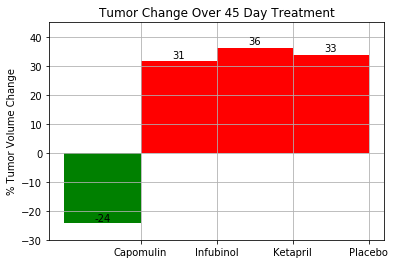

In [14]:
# Create bar graph for % changes

drugs = ('Capomulin','Infubinol', 'Ketapril', 'Placebo')
N = 4

ind = np.arange(N)  # the x locations for the groups
width = 1       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, drugchange, width, label=drugs, color="r")
rects2 = ax.bar(0, capochange, width, label="Capomulin", color="g")

# add some text for labels, title and axes ticks
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_ylim(-30,45)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)


plt.grid()

plt.show()